# Análisis Exploratorio de variables geoespaciales

In [ ]:
pip install geopandas folium

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tabulate import tabulate

# Instalar las librerías necesarias
# pip install geopandas folium

import geopandas as gpd
import folium
from folium import Choropleth

In [ ]:
data_path = 'C:/Users/henry/Documents/jbook/Cacervix/cacervix/datos/'

df = pd.read_excel(data_path + 'CACU1985A2019v2.xls')

In [9]:
#Inicianlizando las bases de datos------------------------------------------------

# df = pd.read_excel("CACU1985A2019v2.xls", engine='xlrd')

# Definir los índices del segundo tercio (16 a 31)
My_vars = df.iloc[:, 16:33]

# Leer el archivo saltando la primera fila
directorio = pd.read_excel(data_path + 'Directorio.xlsx', skiprows=1, header=None, engine='openpyxl')
# Seleccionar solo las tres primeras columnas
directorio = directorio.iloc[:, :3]

# Filtrar desde la fila 17 hasta la 32
directorio = directorio.iloc[15:32, :]


# Reemplazar strings vacíos y espacios en blanco por NaN
My_vars = My_vars.replace(r'^\s*$', pd.NA, regex=True)

# Ahora calculamos los valores faltantes
total_registros = len(My_vars)
na_summary = pd.DataFrame({
    'Valores Faltantes': My_vars.isna().sum(),
    'Porcentaje Faltantes': (My_vars.isna().sum() / total_registros * 100).round(2)
})

# Mostrar solo las variables que tienen valores faltantes
na_summary = na_summary[na_summary['Valores Faltantes'] > 0]
#print("\nResumen de valores faltantes:")
#print(na_summary)


=== Análisis de la variable CODPRES ===
Significado: De acuerdo con la cultura, pueblo o rasgos físicos, el fallecido era o se reconocia como
Valores faltantes: 18676 (36.3%)


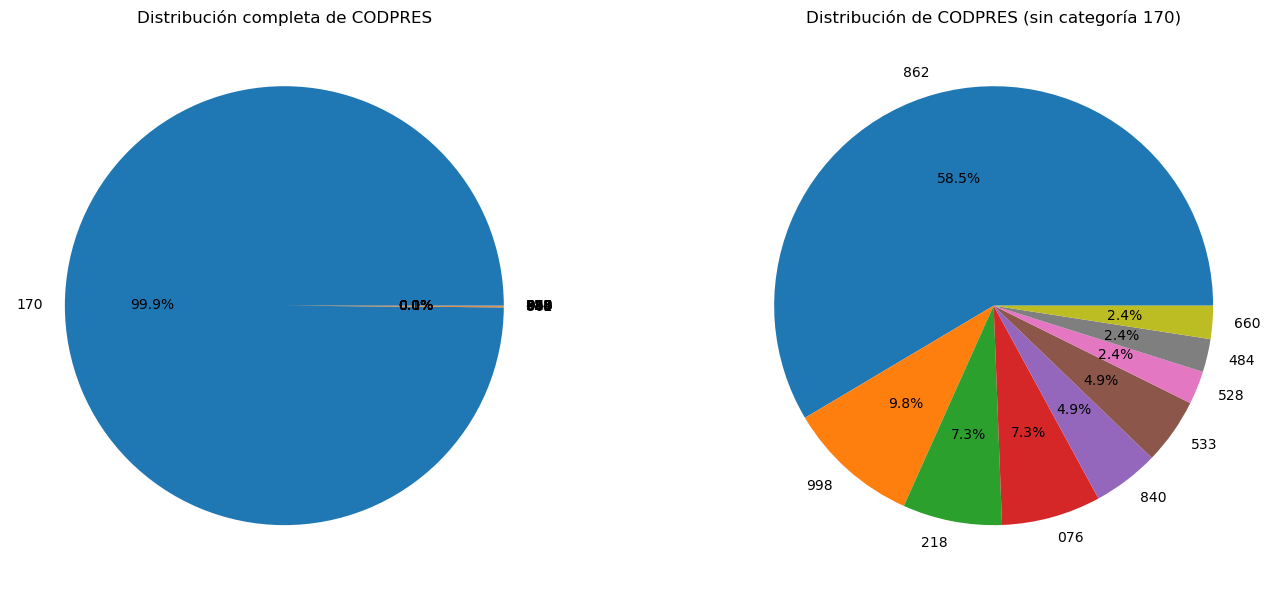


Estadísticas descriptivas:
Número de categorías únicas: 10

Frecuencia de cada categoría:
CODPRES
170    99.8749
862     0.0732
998     0.0122
218     0.0092
076     0.0092
840     0.0061
533     0.0061
528     0.0031
484     0.0031
660     0.0031
Name: proportion, dtype: float64 %


In [10]:
# Análisis descriptivo de CODPRES
print("\n=== Análisis de la variable CODPRES ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[0, 1]  # Primera fila, segunda columna
print(f"Significado: {significado}")

# 2. Análisis de valores faltantes
valores_faltantes = My_vars['CODPRES'].isna().sum()
porcentaje_faltantes = (valores_faltantes / total_registros * 100).round(2)
print(f"Valores faltantes: {valores_faltantes} ({porcentaje_faltantes}%)")

# 3. Crear dos gráficos
plt.figure(figsize=(15, 6))

# Primer gráfico (todas las categorías)
plt.subplot(1, 2, 1)
My_vars['CODPRES'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución completa de CODPRES')
plt.ylabel('')

# Segundo gráfico (sin categoría 170)
plt.subplot(1, 2, 2)
My_vars['CODPRES'][My_vars['CODPRES'] != "170"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de CODPRES (sin categoría 170)')
plt.ylabel('')

# Ajustar layout
plt.tight_layout()
plt.show()

# 4. Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(f"Número de categorías únicas: {My_vars['CODPRES'].nunique()}")
print("\nFrecuencia de cada categoría:")
print(My_vars['CODPRES'].value_counts(normalize=True).round(6) * 100, "%")


=== Análisis de la variable IDPERTET ===
Significado: País de residencia habitual del fallecido, cuando residía en un país diferente a Colombia
Valores faltantes: 31757 (61.73%)

Estadísticas descriptivas:
Número de categorías únicas: 7

Frecuencia de cada categoría:
IDPERTET
6    86.9484
9     5.8250
5     5.0531
1     1.9908
3     0.0965
2     0.0813
4     0.0051
Name: proportion, dtype: float64 %


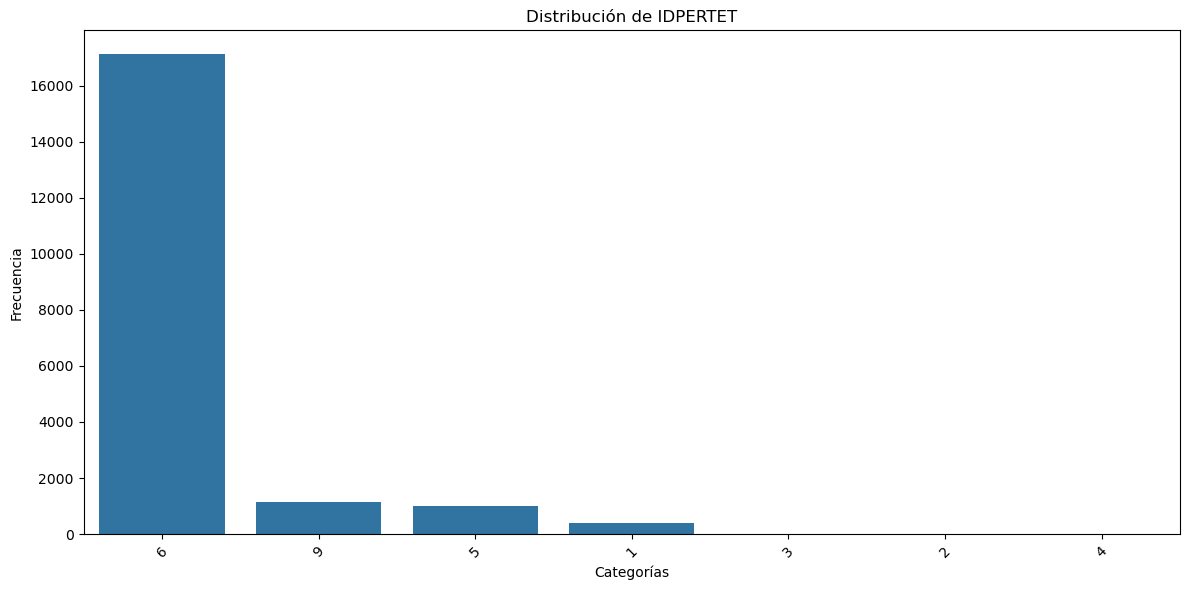

In [11]:
# Análisis descriptivo de IDPERTET
print("\n=== Análisis de la variable IDPERTET ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[1, 1]  # Segunda fila, segunda columna
print(f"Significado: {significado}")

# 2. Análisis de valores faltantes
valores_faltantes = My_vars['IDPERTET'].isna().sum()
porcentaje_faltantes = (valores_faltantes / total_registros * 100).round(2)
print(f"Valores faltantes: {valores_faltantes} ({porcentaje_faltantes}%)")

# 3. Crear gráfico de barras
plt.figure(figsize=(12, 6))
value_counts = My_vars['IDPERTET'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Distribución de IDPERTET')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# 4. Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(f"Número de categorías únicas: {My_vars['IDPERTET'].nunique()}")
print("\nFrecuencia de cada categoría:")
print(My_vars['IDPERTET'].value_counts(normalize=True).round(6) * 100, "%")

plt.tight_layout()
plt.show()


=== Análisis de la variable AREA_RES ===
Significado: Área de residencia habitual del fallecido
Valores faltantes: 18924 (36.78%)

Estadísticas descriptivas:
Número de categorías únicas: 4

Frecuencia de cada categoría:
AREA_RES
1    26729
3     3309
2     2115
9      371
Name: count, dtype: int64


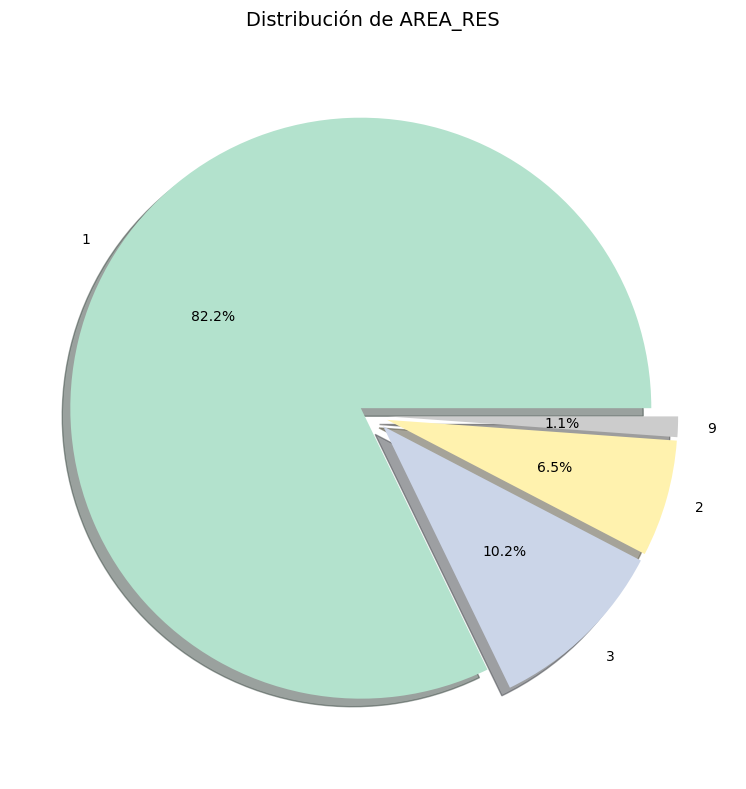

In [12]:
# Análisis descriptivo de AREA_RES
print("\n=== Análisis de la variable AREA_RES ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[4, 1]  # Quinta fila, segunda columna
print(f"Significado: {significado}")

# 2. Análisis de valores faltantes
valores_faltantes = My_vars['AREA_RES'].isna().sum()
porcentaje_faltantes = (valores_faltantes / total_registros * 100).round(2)
print(f"Valores faltantes: {valores_faltantes} ({porcentaje_faltantes}%)")

# 3. Crear gráfico circular
plt.figure(figsize=(10, 8))
value_counts = My_vars['AREA_RES'].value_counts()

# Crear pie chart con porcentajes
plt.pie(value_counts.values,
        labels=value_counts.index,
        autopct='%1.1f%%',
        colors=plt.cm.Pastel2(np.linspace(0, 1, len(value_counts))),  # Colores pastel
        explode=[0.05] * len(value_counts),  # Separación ligera de todas las secciones
        shadow=True)  # Efecto de sombra

plt.title('Distribución de AREA_RES', pad=20, fontsize=14)

# 4. Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(f"Número de categorías únicas: {My_vars['AREA_RES'].nunique()}")
print("\nFrecuencia de cada categoría:")
print(My_vars['AREA_RES'].value_counts())

plt.tight_layout()
plt.show()


=== Análisis de la variable SEG_SOCIAL ===
Significado: Régimen de seguridad social del fallecido
Valores faltantes: 15462 (30.05%)

Estadísticas descriptivas:
Número de categorías únicas: 7

Frecuencia de cada categoría:
SEG_SOCIAL
2    19258
1    10656
3     3858
4      898
5      659
9      530
6      127
Name: count, dtype: int64


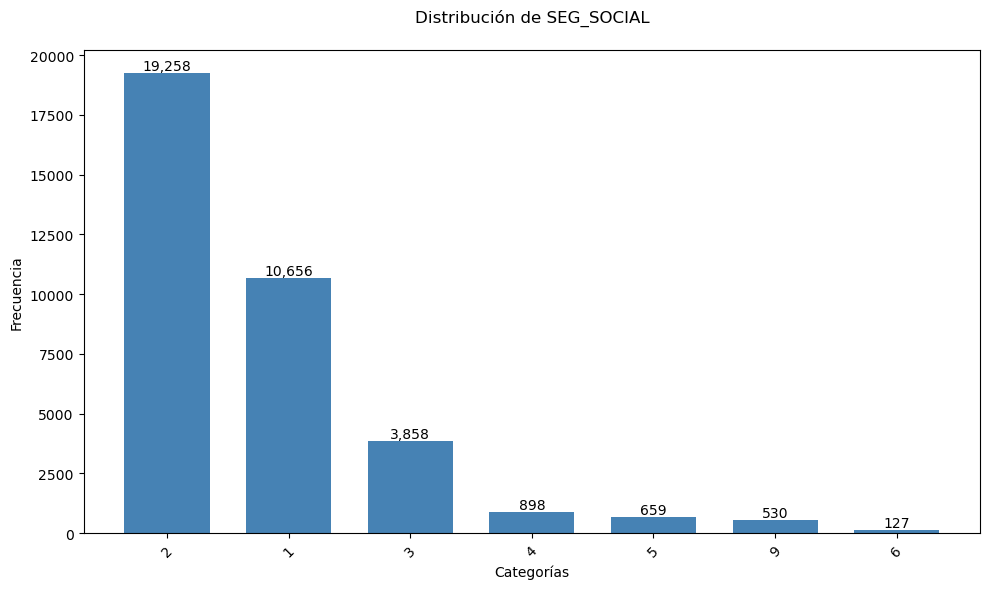

In [13]:
# Análisis descriptivo de SEG_SOCIAL
print("\n=== Análisis de la variable SEG_SOCIAL ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[5, 1]  # Sexta fila, segunda columna
print(f"Significado: {significado}")

# 2. Análisis de valores faltantes
valores_faltantes = My_vars['SEG_SOCIAL'].isna().sum()
porcentaje_faltantes = (valores_faltantes / total_registros * 100).round(2)
print(f"Valores faltantes: {valores_faltantes} ({porcentaje_faltantes}%)")

# 3. Crear gráfico de barras minimalista
plt.figure(figsize=(10, 6))
value_counts = My_vars['SEG_SOCIAL'].value_counts()

# Crear barras con un solo color y espaciado
bars = plt.bar(range(len(value_counts)),
               value_counts.values,
               color='steelblue',  # Color único y sobrio
               width=0.7)  # Ancho de las barras

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}',  # Formato con separador de miles
             ha='center', va='bottom')

# Configurar etiquetas y título
plt.title('Distribución de SEG_SOCIAL', pad=20, fontsize=12)
plt.xlabel('Categorías', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.xticks(range(len(value_counts)), value_counts.index, rotation=45)

# 4. Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(f"Número de categorías únicas: {My_vars['SEG_SOCIAL'].nunique()}")
print("\nFrecuencia de cada categoría:")
print(My_vars['SEG_SOCIAL'].value_counts())

plt.tight_layout()
plt.show()


=== Análisis de la variable IDADMISALU ===
Significado: Entidad Administradora en Salud, a la que pertenecía el fallecido  (para muerte fetal, o de menor de un año la entidad administradora a la que pertenecía la madre)
Valores faltantes: 37686 (73.25%)

Estadísticas descriptivas:
Número de categorías únicas: 6

Frecuencia de cada categoría:
IDADMISALU
2    8751
1    4269
5     369
9     320
4      34
3      19
Name: count, dtype: int64


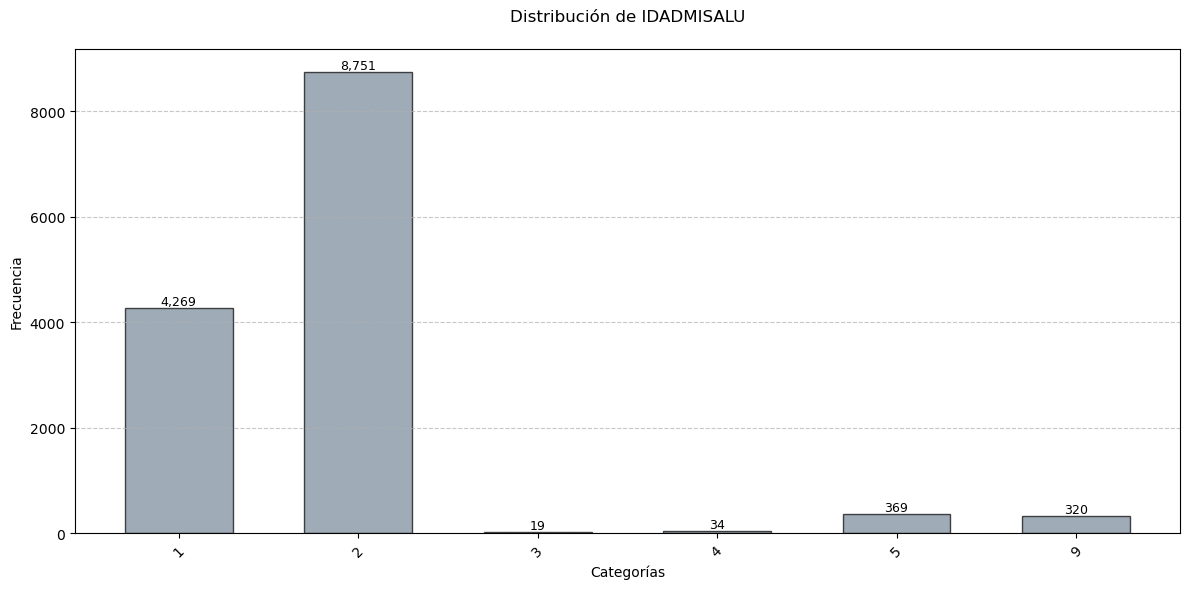

In [14]:
# Análisis descriptivo de IDADMISALU
print("\n=== Análisis de la variable IDADMISALU ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[6, 1]  # Séptima fila, segunda columna
print(f"Significado: {significado}")

# 2. Análisis de valores faltantes
valores_faltantes = My_vars['IDADMISALU'].isna().sum()
porcentaje_faltantes = (valores_faltantes / total_registros * 100).round(2)
print(f"Valores faltantes: {valores_faltantes} ({porcentaje_faltantes}%)")

# 3. Crear gráfico de barras minimalista
plt.figure(figsize=(12, 6))
value_counts = My_vars['IDADMISALU'].value_counts().sort_index()  # Ordenar por índice

# Crear barras con gradiente de color
bars = plt.bar(range(len(value_counts)),
               value_counts.values,
               color='lightslategray',  # Color sobrio diferente
               width=0.6,              # Barras más delgadas
               edgecolor='black',      # Borde negro
               alpha=0.7)              # Transparencia ligera

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}',
             ha='center', va='bottom',
             fontsize=9)

# Configurar etiquetas y título
plt.title('Distribución de IDADMISALU', pad=20, fontsize=12)
plt.xlabel('Categorías', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.xticks(range(len(value_counts)), value_counts.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de guía horizontales

# 4. Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(f"Número de categorías únicas: {My_vars['IDADMISALU'].nunique()}")
print("\nFrecuencia de cada categoría:")
print(My_vars['IDADMISALU'].value_counts())

plt.tight_layout()
plt.show()


=== Análisis de la variable IDCLASADMI ===
Significado: Nombre de la administradora
Valores faltantes: 39494 (76.76%)

Distribución de frecuencias:
+-------------------------------------------------------------------------------------------------------------------------+------------+------------+
|                                                     Administradora                                                      | Frecuencia | Porcentaje |
+-------------------------------------------------------------------------------------------------------------------------+------------+------------+
|                                                     SIN INFORMACION                                                     |    1399    |   11.7%    |
|                                  CAPRECOM - CAJA DE PREVISION SOCIAL DE COMUNICACIONES                                  |    977     |   8.17%    |
|                                                      NUEVA EPS SA                                  

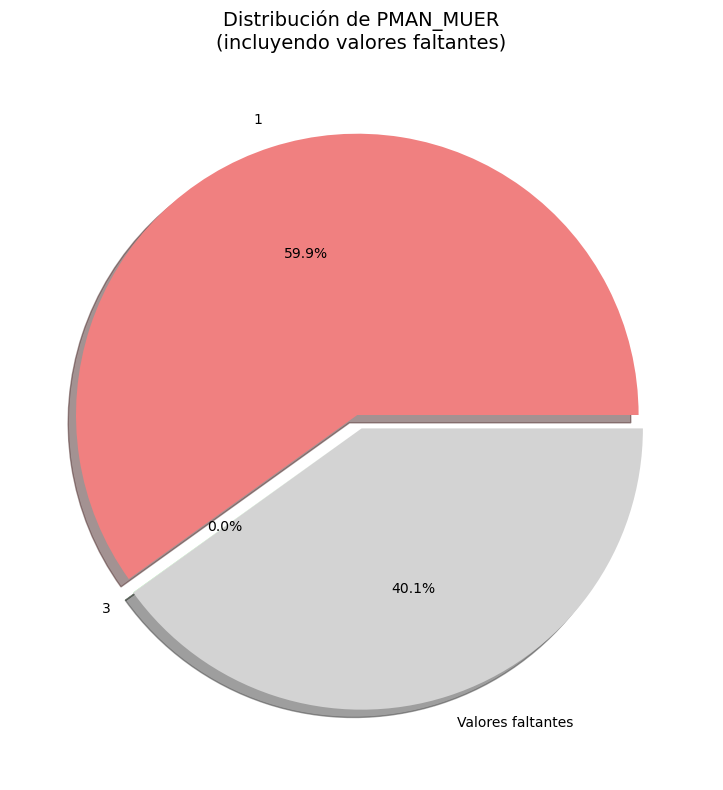

In [15]:
# Análisis descriptivo de IDCLASADMI
print("\n=== Análisis de la variable IDCLASADMI ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[7, 1]  # Octava fila, segunda columna
print(f"Significado: {significado}")

# 2. Análisis de valores faltantes
valores_faltantes = My_vars['IDCLASADMI'].isna().sum()
porcentaje_faltantes = (valores_faltantes / total_registros * 100).round(2)
print(f"Valores faltantes: {valores_faltantes} ({porcentaje_faltantes}%)")

# 3. Crear tabla formateada
freq_table = pd.DataFrame({
    'Administradora': My_vars['IDCLASADMI'].value_counts().index,
    'Frecuencia': My_vars['IDCLASADMI'].value_counts().values,
    'Porcentaje': (My_vars['IDCLASADMI'].value_counts(normalize=True) * 100).round(2)
})

# Formatear porcentajes
freq_table['Porcentaje'] = freq_table['Porcentaje'].astype(str) + '%'

# 4. Mostrar tabla formateada
print("\nDistribución de frecuencias:")
print(tabulate(freq_table, headers='keys', tablefmt='pretty', showindex=False))

# 5. Estadísticas básicas
print(f"\nNúmero de administradoras únicas: {My_vars['IDCLASADMI'].nunique()}")

#-------------------------------------------------------------------------------
# Análisis descriptivo de PMAN_MUER
print("\n=== Análisis de la variable PMAN_MUER ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[8, 1]  # Novena fila, segunda columna
print(f"Significado: {significado}")

# 2. Crear gráfico circular incluyendo valores faltantes
plt.figure(figsize=(10, 8))

# Obtener conteos incluyendo valores faltantes
total_counts = pd.Series({
    **My_vars['pman_muer'].value_counts().to_dict(),
    'Valores faltantes': My_vars['pman_muer'].isna().sum()
})

# Definir colores para cada categoría
colors = ['lightcoral', 'lightgreen', 'lightgray']  # El último color es para valores faltantes
explode = [0.05, 0, 0]  # Destacar solo la categoría menos frecuente (excluyendo NA)

# Crear pie chart con porcentajes
plt.pie(total_counts.values,
        labels=total_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        shadow=True)

plt.title('Distribución de PMAN_MUER\n(incluyendo valores faltantes)', pad=20, fontsize=14)

plt.tight_layout()
plt.show()


=== Análisis de la variable CONS_EXP ===
Significado: Certificación médica
Valores faltantes: 0 (0.0%)

Estadísticas descriptivas:
Número de categorías únicas: 5

Frecuencia de cada categoría (incluyendo todas):
CONS_EXP
2    32546
1    18036
3      638
4      207
9       21
Name: count, dtype: int64


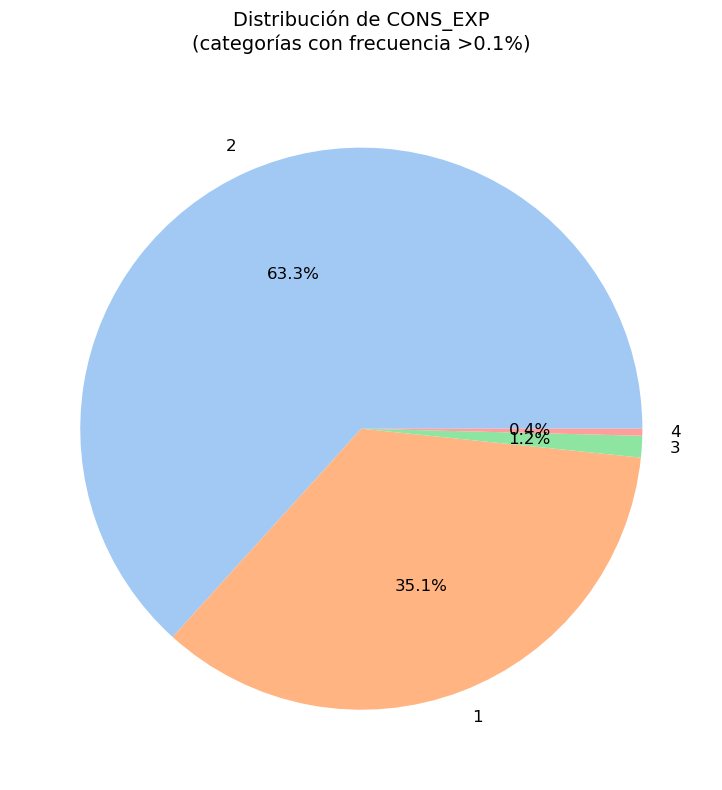

In [16]:
# Análisis descriptivo de CONS_EXP
print("\n=== Análisis de la variable CONS_EXP ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[9, 1]  # Décima fila, segunda columna
print(f"Significado: {significado}")

# 2. Análisis de valores faltantes
valores_faltantes = My_vars['CONS_EXP'].isna().sum()
porcentaje_faltantes = (valores_faltantes / total_registros * 100).round(2)
print(f"Valores faltantes: {valores_faltantes} ({porcentaje_faltantes}%)")

# 3. Crear gráfico circular
plt.figure(figsize=(12, 8))
# Filtrar categorías con frecuencia relativa > 0.1%
value_counts = My_vars['CONS_EXP'].value_counts()
value_counts = value_counts[value_counts/len(My_vars) > 0.001]

# Crear pie chart con porcentajes
plt.pie(value_counts.values,
        labels=value_counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette("pastel"),
        #explode=[0.005] * len(value_counts),   Reducir la separación
        shadow=False,
        textprops={'fontsize': 12})

plt.title('Distribución de CONS_EXP\n(categorías con frecuencia >0.1%)', pad=20, fontsize=14)

# 4. Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(f"Número de categorías únicas: {My_vars['CONS_EXP'].nunique()}")
print("\nFrecuencia de cada categoría (incluyendo todas):")
print(My_vars['CONS_EXP'].value_counts())

plt.tight_layout()
plt.show()


=== Análisis de la variable c_muerte ===
Significado: Departamento de ocurrencia del hecho cuando es muerte violencia
Valores faltantes: 23318 (45.32%)

Estadísticas descriptivas:
Número de categorías únicas: 4

Frecuencia de cada categoría:
c_muerte
2    22939
4     4956
1      148
3       87
Name: count, dtype: int64


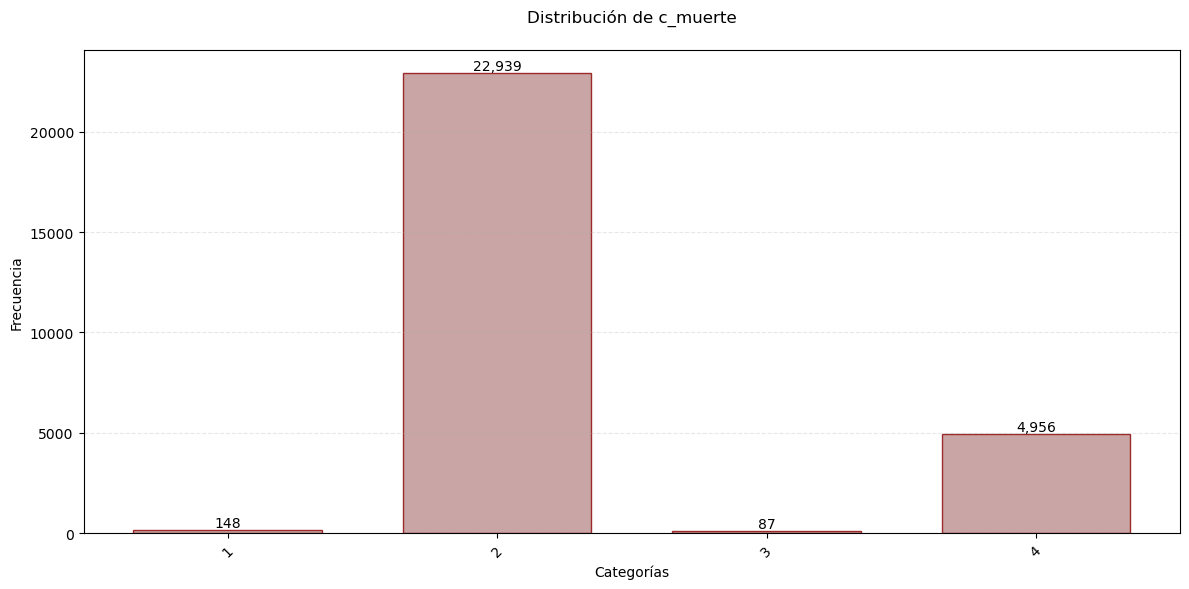

In [17]:
# Análisis descriptivo de c_muerte
print("\n=== Análisis de la variable c_muerte ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[10, 1]  # Decimoprimera fila, segunda columna
print(f"Significado: {significado}")

# 2. Análisis de valores faltantes
valores_faltantes = My_vars['c_muerte'].isna().sum()
porcentaje_faltantes = (valores_faltantes / total_registros * 100).round(2)
print(f"Valores faltantes: {valores_faltantes} ({porcentaje_faltantes}%)")

# 3. Crear gráfico de barras
plt.figure(figsize=(12, 6))
value_counts = My_vars['c_muerte'].value_counts().sort_index()

# Crear barras con diseño minimalista
bars = plt.bar(range(len(value_counts)),
               value_counts.values,
               color='rosybrown',      # Color suave rojizo
               width=0.7,              # Ancho de las barras
               edgecolor='darkred',    # Borde más oscuro
               alpha=0.8)              # Ligera transparencia

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}',
             ha='center', va='bottom',
             fontsize=10)

# Configurar etiquetas y título
plt.title('Distribución de c_muerte', pad=20, fontsize=12)
plt.xlabel('Categorías', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.xticks(range(len(value_counts)), value_counts.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Grid sutil

# 4. Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(f"Número de categorías únicas: {My_vars['c_muerte'].nunique()}")
print("\nFrecuencia de cada categoría:")
print(My_vars['c_muerte'].value_counts())

plt.tight_layout()
plt.show()


=== Análisis de la variable ASIS_MED ===
Significado: Municipio de ocurrencia del hecho cuando es muerte violencia
Valores faltantes: 15462 (30.05%)

Estadísticas descriptivas:
Número de categorías únicas: 4

Frecuencia de cada categoría:
ASIS_MED
1    31305
2     3798
9      743
3      140
Name: count, dtype: int64


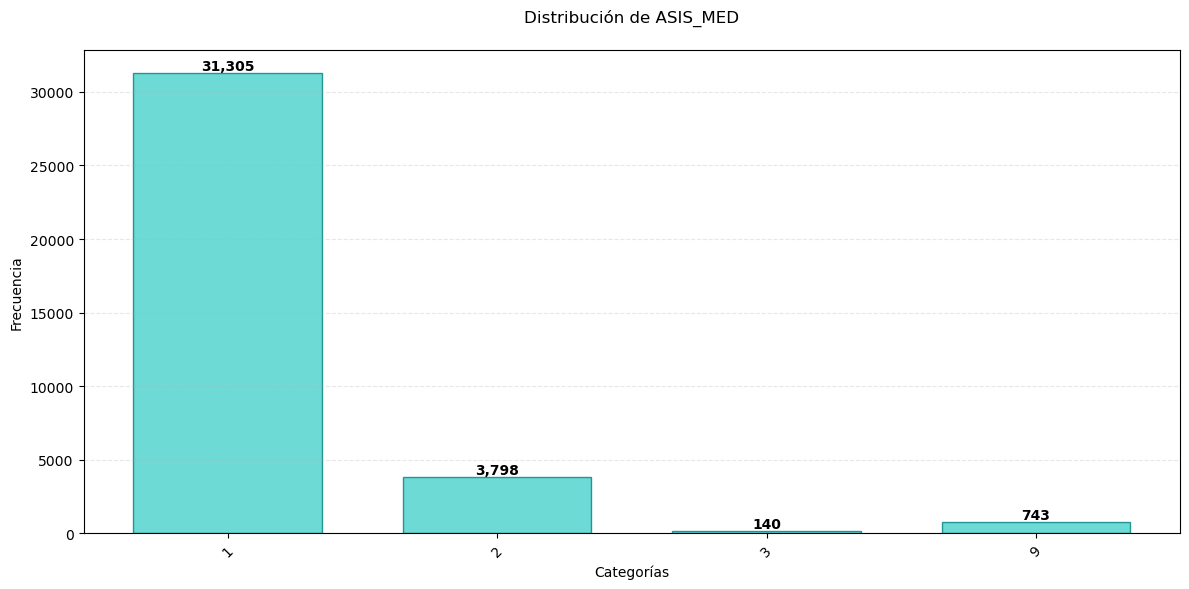

In [18]:
# Análisis descriptivo de ASIS_MED
print("\n=== Análisis de la variable ASIS_MED ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[11, 1]  # Decimosegunda fila, segunda columna
print(f"Significado: {significado}")

# 2. Análisis de valores faltantes
valores_faltantes = My_vars['ASIS_MED'].isna().sum()
porcentaje_faltantes = (valores_faltantes / total_registros * 100).round(2)
print(f"Valores faltantes: {valores_faltantes} ({porcentaje_faltantes}%)")

# 3. Crear gráfico de barras
plt.figure(figsize=(12, 6))
value_counts = My_vars['ASIS_MED'].value_counts().sort_index()

# Crear barras con diseño minimalista
bars = plt.bar(range(len(value_counts)),
               value_counts.values,
               color='mediumturquoise',  # Color turquesa médico
               width=0.7,                # Ancho de las barras
               edgecolor='teal',         # Borde verde azulado
               alpha=0.8)                # Ligera transparencia

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}',
             ha='center', va='bottom',
             fontsize=10,
             fontweight='bold')

# Configurar etiquetas y título
plt.title('Distribución de ASIS_MED', pad=20, fontsize=12)
plt.xlabel('Categorías', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.xticks(range(len(value_counts)), value_counts.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Grid sutil

# 4. Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(f"Número de categorías únicas: {My_vars['ASIS_MED'].nunique()}")
print("\nFrecuencia de cada categoría:")
print(My_vars['ASIS_MED'].value_counts())

plt.tight_layout()
plt.show()


=== Análisis de la variable CAUSA_MULT ===
Significado: Como determino la causa de muerte - A
Valores faltantes: 49629 (96.46%)

Ejemplos de formatos de códigos encontrados:
Ejemplo 50715: <NA>
Ejemplo 22096: J960/K729/K720/C539 C787
Ejemplo 35751: <NA>
Ejemplo 4213: <NA>
Ejemplo 28185: <NA>

Estadísticas descriptivas:
Número total de códigos únicos: 563
Número de familias de códigos: 18

Familias más frecuentes:
familia
C    2350
R     696
J     642
I     605
N     522
E     196
K     173
D     107
G      74
A      64
Name: count, dtype: int64


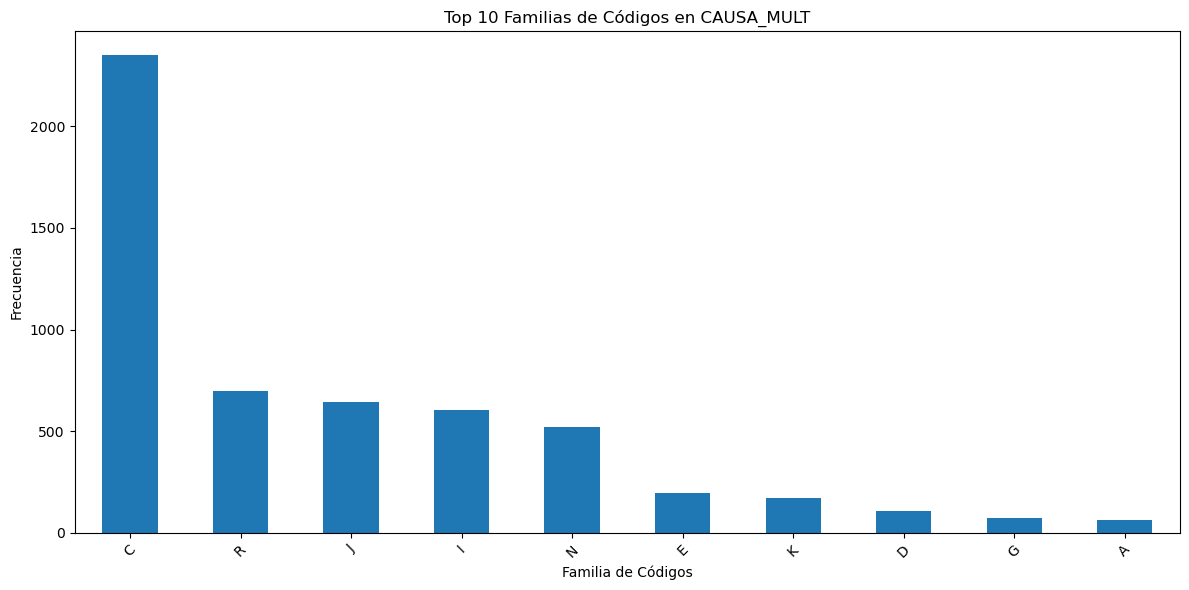

In [19]:
# Análisis descriptivo de CAUSA_MULT
print("\n=== Análisis de la variable CAUSA_MULT ===")

# 1. Obtener significado de la variable desde directorio
significado = directorio.iloc[12, 1]
print(f"Significado: {significado}")

# 2. Análisis de valores faltantes
valores_faltantes = My_vars['CAUSA_MULT'].isna().sum()
porcentaje_faltantes = (valores_faltantes / total_registros * 100).round(2)
print(f"Valores faltantes: {valores_faltantes} ({porcentaje_faltantes}%)")

# 3. Análisis de estructura de códigos
print("\nEjemplos de formatos de códigos encontrados:")
# Mostrar algunos ejemplos de cada tipo de formato
ejemplos = My_vars['CAUSA_MULT'].sample(n=5)
for idx, ejemplo in ejemplos.items():
    print(f"Ejemplo {idx}: {ejemplo}")

# 4. Separar códigos múltiples
def separar_codigos(codigo):
    if pd.isna(codigo):
        return []
    # Separar por / o *
    if isinstance(codigo, str):
        return [c.strip() for c in codigo.replace('*', '/').split('/')]
    return [str(codigo)]

# Obtener todos los códigos únicos
todos_codigos = []
for codigo in My_vars['CAUSA_MULT']:
    todos_codigos.extend(separar_codigos(codigo))

# Crear DataFrame con códigos separados
codigos_df = pd.DataFrame({'codigo': todos_codigos})

# 5. Agrupar por familia (primeros caracteres)
codigos_df['familia'] = codigos_df['codigo'].str[:1]
familias_count = codigos_df['familia'].value_counts()

# 6. Visualizar distribución de familias principales
plt.figure(figsize=(12, 6))
familias_count.head(10).plot(kind='bar')
plt.title('Top 10 Familias de Códigos en CAUSA_MULT')
plt.xlabel('Familia de Códigos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# 7. Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(f"Número total de códigos únicos: {len(set(todos_codigos))}")
print(f"Número de familias de códigos: {len(familias_count)}")
print("\nFamilias más frecuentes:")
print(familias_count.head(10))

plt.tight_layout()
plt.show()


=== Análisis de las variables C_DIR1 y C_DIR12 ===


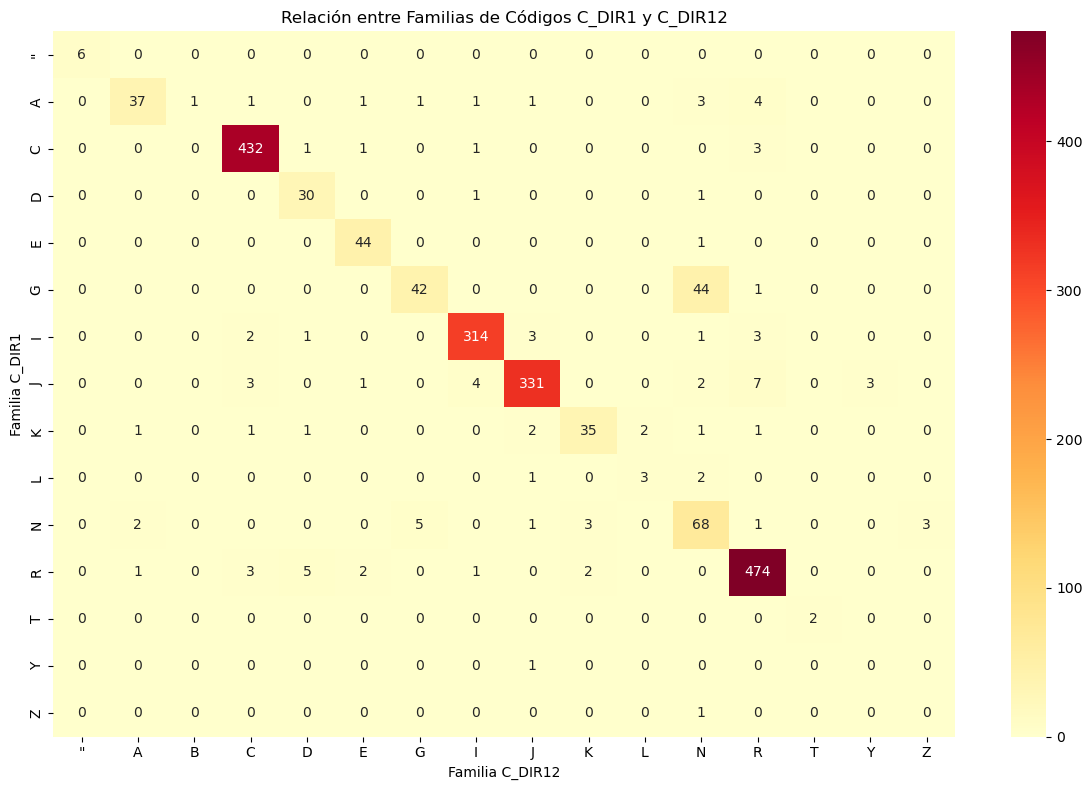

In [20]:
# Análisis descriptivo conjunto de C_DIR1 y C_DIR12
print("\n=== Análisis de las variables C_DIR1 y C_DIR12 ===")

# Resolver referencias (comillas)
def resolver_referencias(serie1, serie2):
    resultado = serie2.copy()
    resultado[serie2 == '"'] = serie1[serie2 == '"']
    return resultado

# Resolver C_DIR12
c_dir12_resolved = resolver_referencias(My_vars['C_DIR1'], My_vars['C_DIR12'])

# Crear DataFrames para análisis
causas_df = pd.DataFrame({
    'C_DIR1': My_vars['C_DIR1'],
    'C_DIR12': c_dir12_resolved
})

# Agrupar por familias
causas_df['familia_dir1'] = causas_df['C_DIR1'].str[:1]
causas_df['familia_dir12'] = causas_df['C_DIR12'].str[:1]

# Crear tabla cruzada de las familias más frecuentes
cross_tab = pd.crosstab(causas_df['familia_dir1'], causas_df['familia_dir12'])

# Visualizar relación entre causas
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Relación entre Familias de Códigos C_DIR1 y C_DIR12')
plt.xlabel('Familia C_DIR12')
plt.ylabel('Familia C_DIR1')

plt.tight_layout()
plt.show()